# Práctica Módulo Machine Learning

Objetivo: predecir el precio de un piso de Airbnb en Madrid utilizando los datos disponibles

### 1) Cargar librerías que vamos a usar

In [1]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

# Para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2) Vamos a echarle un vistazo al dataset completo:

In [2]:
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
full_df.head(5).T

,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
Summary,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Space,This loft has a spectacular view of the hills ...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",You wake up to the sun rising over Barcelona's...,"License: HUTB-005313 Charming apartment, locat..."
Description,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,This neighborhood is located in the hills west...,Plaza Cataluña Catalonia Square is the large...,Plaza Cataluña Catalonia Square is the large...,We're right in the heart of the chic L'Eixampl...,NaN


In [3]:
full_df.shape

(14780, 89)

Voy a trabajar solamente con los apartamentos de Madrid:

In [4]:
madrid = full_df['City'] == 'Madrid'

In [5]:
full_df = full_df[madrid]
full_df.head().T

,40,41,42,43,44
ID,6478626,4941335,12510355,4756811,15332216
Listing Url,https://www.airbnb.com/rooms/6478626,https://www.airbnb.com/rooms/4941335,https://www.airbnb.com/rooms/12510355,https://www.airbnb.com/rooms/4756811,https://www.airbnb.com/rooms/15332216
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación con baño .,Cómodo estudio en la calle Goya,Studio & Terrace - Barrio Salamanca,Cute single room -private bathroom,Deluxe Apartment in Barrio Salamanca (next to IE)
Summary,"Habitación con cama de 150 , para una o dos p...",Bonito estudio en el barrio comercial y financ...,"Bright and refurbished studio, located in one ...",Nice single room in the best area of Madrid. T...,Located in the heart of Barrio de Salamanca. S...
Space,Tranquilidad y respeto del espacio room with b...,"Este estudio, regentado por Marta y Marcos, ha...","Bright and refurbished studio, located in one ...",NaN,"- Apartment of 68 square meters, modern buildi..."
Description,"Habitación con cama de 150 , para una o dos p...",Bonito estudio en el barrio comercial y financ...,"Bright and refurbished studio, located in one ...",Nice single room in the best area of Madrid. T...,Located in the heart of Barrio de Salamanca. S...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,"Barrio muy bien comunicado , metro , autobús ,...",NaN,"The Studio is located in a quiet street, in th...",NaN,Located in the heart of Salamanca district on ...


Una vez filtrados los apartamentos de Madrid, las variables City, Country, State y Country Code ya no tienen utilidad en mi análisis:

In [6]:
full_df = full_df.drop(['City', 'Country Code', 'Country', 'State'], axis=1)

Voy a eliminar todas las columnas que contengan "URL", porque sé que no van a aportar ninguna información a mi predicción

In [7]:
#Veo nombres de columnas
col_names = list(full_df.columns)
col_names

['ID',
 'Listing Url',
 'Scrape ID',
 'Last Scraped',
 'Name',
 'Summary',
 'Space',
 'Description',
 'Experiences Offered',
 'Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Thumbnail Url',
 'Medium Url',
 'Picture Url',
 'XL Picture Url',
 'Host ID',
 'Host URL',
 'Host Name',
 'Host Since',
 'Host Location',
 'Host About',
 'Host Response Time',
 'Host Response Rate',
 'Host Acceptance Rate',
 'Host Thumbnail Url',
 'Host Picture Url',
 'Host Neighbourhood',
 'Host Listings Count',
 'Host Total Listings Count',
 'Host Verifications',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'Zipcode',
 'Market',
 'Smart Location',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimu

In [8]:
#Busco todas las columnas que contengan 'URL'
for i in range(len(col_names)):
    if 'URL' in col_names[i] or 'Url' in col_names[i] :
        full_df = full_df.drop(col_names[i], axis = 1)

full_df.head(5).T

,40,41,42,43,44
ID,6478626,4941335,12510355,4756811,15332216
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación con baño .,Cómodo estudio en la calle Goya,Studio & Terrace - Barrio Salamanca,Cute single room -private bathroom,Deluxe Apartment in Barrio Salamanca (next to IE)
Summary,"Habitación con cama de 150 , para una o dos p...",Bonito estudio en el barrio comercial y financ...,"Bright and refurbished studio, located in one ...",Nice single room in the best area of Madrid. T...,Located in the heart of Barrio de Salamanca. S...
Space,Tranquilidad y respeto del espacio room with b...,"Este estudio, regentado por Marta y Marcos, ha...","Bright and refurbished studio, located in one ...",NaN,"- Apartment of 68 square meters, modern buildi..."
Description,"Habitación con cama de 150 , para una o dos p...",Bonito estudio en el barrio comercial y financ...,"Bright and refurbished studio, located in one ...",Nice single room in the best area of Madrid. T...,Located in the heart of Barrio de Salamanca. S...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,"Barrio muy bien comunicado , metro , autobús ,...",NaN,"The Studio is located in a quiet street, in th...",NaN,Located in the heart of Salamanca district on ...
Notes,NaN,NaN,"Check in time is at 3pm or later, although som...",NaN,- Subway station SERRANO (2 min) - Instituto d...


Decido también eliminar aquellas columnas que contienen un texto plano, porque no van a aportar nada a mi predicción.

In [9]:
full_df = full_df.drop(['Features','Name','Space','Summary','Description','Neighborhood Overview','Host Name','Notes','Host About','Access', 'Interaction', 'House Rules'], axis=1)
full_df.head(5).T

,40,41,42,43,44
ID,6478626,4941335,12510355,4756811,15332216
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Experiences Offered,none,none,none,none,none
Transit,Metro conde de Casal abajo de casa . Líneas de...,NaN,PUBLIC TRANSPORT Subway/Metro station Serrano ...,NaN,- It has several subway lines very close: - Se...
Host ID,25709853,25465787,67750039,3511249,10812091
Host Since,2015-01-06,2015-01-01,2016-04-18,2012-09-08,2013-12-25
Host Location,"Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain",ES,"Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,within an hour,within a few hours,within an hour,within an hour,within an hour
Host Response Rate,84.0,100.0,100.0,100.0,100.0


Los códigos ID ni la info del scrapping tampoco van a aportar nada a mi modelo, los elimino:

In [10]:
full_df = full_df.drop(['ID', 'Last Scraped','Calendar last Scraped','Scrape ID', 'Host ID', 'License'], axis=1)
full_df.head(5).T

,40,41,42,43,44
Experiences Offered,none,none,none,none,none
Transit,Metro conde de Casal abajo de casa . Líneas de...,NaN,PUBLIC TRANSPORT Subway/Metro station Serrano ...,NaN,- It has several subway lines very close: - Se...
Host Since,2015-01-06,2015-01-01,2016-04-18,2012-09-08,2013-12-25
Host Location,"Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain",ES,"Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,within an hour,within a few hours,within an hour,within an hour,within an hour
Host Response Rate,84.0,100.0,100.0,100.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,NaN,Recoletos,Recoletos,Recoletos,Recoletos
Host Listings Count,3.0,1.0,2.0,8.0,2.0
Host Total Listings Count,3.0,1.0,2.0,8.0,2.0


In [11]:
full_df.shape

(13207, 59)

### 3) Esta limpieza la hemos hecho en general, haciendo uso del sentido común y práctico para plantear el problema. Ahora ya hacemos uso de la función de sklearn train_test_split para dividir todo el conjunto entre train y test

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos en dos ficheros csv distintos e independientes
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos SOLAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10565, 59)
Dimensiones del dataset de test: (2642, 59)


In [13]:
df.head(5).T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Transit,NaN,NaN,Here you can find an interesting web of Madrid...,"My recomendation, WALKING. around have all his...",NaN
Host Since,2016-05-30,2015-10-19,2015-02-10,2016-11-27,2015-11-20
Host Location,"Madrid, Community of Madrid, Spain",ES,"Madrid, Community of Madrid, Spain",ES,"Madrid, Community of Madrid, Spain"
Host Response Time,within an hour,NaN,within an hour,within an hour,NaN
Host Response Rate,100.0,NaN,100.0,100.0,NaN
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,NaN,NaN,Cortes,Sol,Pacifico
Host Listings Count,2.0,1.0,3.0,6.0,1.0
Host Total Listings Count,2.0,1.0,3.0,6.0,1.0


### 4) Comienzo el análisis exploratorio:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             10565 non-null  object 
 1   Transit                         6592 non-null   object 
 2   Host Since                      10563 non-null  object 
 3   Host Location                   10533 non-null  object 
 4   Host Response Time              9225 non-null   object 
 5   Host Response Rate              9225 non-null   float64
 6   Host Acceptance Rate            0 non-null      float64
 7   Host Neighbourhood              7945 non-null   object 
 8   Host Listings Count             10563 non-null  float64
 9   Host Total Listings Count       10563 non-null  float64
 10  Host Verifications              10559 non-null  object 
 11  Street                          10565 non-null  object 
 12  Neighbourhood                   

Aquellas variables con todas las entradas con valores *null* las voy a eliminar

In [15]:
df = df.drop(['Host Acceptance Rate','Has Availability','Jurisdiction Names'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             10565 non-null  object 
 1   Transit                         6592 non-null   object 
 2   Host Since                      10563 non-null  object 
 3   Host Location                   10533 non-null  object 
 4   Host Response Time              9225 non-null   object 
 5   Host Response Rate              9225 non-null   float64
 6   Host Neighbourhood              7945 non-null   object 
 7   Host Listings Count             10563 non-null  float64
 8   Host Total Listings Count       10563 non-null  float64
 9   Host Verifications              10559 non-null  object 
 10  Street                          10565 non-null  object 
 11  Neighbourhood                   6998 non-null   object 
 12  Neighbourhood Cleansed          

También elimino variables cuyas entradas son prácticamente todas null ya que son demasiados valores nulos como para poder sacar alguna info o poder extrapolar, usando un modelo: 
Square Feet, Weekly Price, Monthly Price,  Security Deposit,  Cleaning Fee

In [16]:
df = df.drop(['Square Feet','Weekly Price','Monthly Price', 'Security Deposit','Cleaning Fee'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             10565 non-null  object 
 1   Transit                         6592 non-null   object 
 2   Host Since                      10563 non-null  object 
 3   Host Location                   10533 non-null  object 
 4   Host Response Time              9225 non-null   object 
 5   Host Response Rate              9225 non-null   float64
 6   Host Neighbourhood              7945 non-null   object 
 7   Host Listings Count             10563 non-null  float64
 8   Host Total Listings Count       10563 non-null  float64
 9   Host Verifications              10559 non-null  object 
 10  Street                          10565 non-null  object 
 11  Neighbourhood                   6998 non-null   object 
 12  Neighbourhood Cleansed          

La columna de *Experiences Offered* sale sin nulos, pero en el head de arriba he visto que hay valores *"None"*, voy a ver si hay algún valor más dentro del conjunto de datos ...

In [17]:
df["Experiences Offered"].describe()

count     10565
unique        1
top        none
freq      10565
Name: Experiences Offered, dtype: object

Efectivamente no son valores nulos como tal, pero al ser todos *None* no me aportan info. Elimino esta columna:

In [18]:
df = df.drop(["Experiences Offered"], axis=1)

Veo qué info me aporta la variable "Street" 

In [19]:
df["Street"].describe()

count                                                 10565
unique                                                  615
top       Embajadores, Madrid, Comunidad de Madrid 28012...
freq                                                    464
Name: Street, dtype: object

No me da la calle como tal, es información redundante con respecto a otras columnas (Barrio, Zipcode...)
Decido eliminarla

In [20]:
df = df.drop(["Street"], axis=1)

Para el resto, relleno los valores nulos con la moda o media, según tenga más sentido (en variables no numéricas siempre irá la moda):

In [21]:
df["Transit"].fillna(df["Transit"].mode()[0], inplace=True)
df["Host Since"].fillna(df["Host Since"].mode()[0], inplace=True)
df["Host Location"].fillna(df["Host Location"].mode()[0], inplace=True)
df["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)
df["Host Response Rate"].fillna(df["Host Response Rate"].mode()[0], inplace=True)
df["Host Neighbourhood"].fillna(df["Host Neighbourhood"].mode()[0], inplace=True)
df["Host Listings Count"].fillna(df["Host Listings Count"].mode()[0], inplace=True)
df["Host Total Listings Count"].fillna(df["Host Total Listings Count"].mode()[0], inplace=True)
df["Host Verifications"].fillna(df["Host Verifications"].mode()[0], inplace=True)

df["Bathrooms"].fillna(df["Bathrooms"].mode()[0], inplace=True)
df["Bedrooms"].fillna(df["Bedrooms"].mode()[0], inplace=True)
df["Beds"].fillna(df["Beds"].mode()[0], inplace=True)
df["Price"].fillna(df["Price"].mean(), inplace=True)

df["First Review"].fillna(df["First Review"].mode()[0], inplace=True)
df["Last Review"].fillna(df["Last Review"].mode()[0], inplace=True)
df["Review Scores Rating"].fillna(df["Review Scores Rating"].mode()[0], inplace=True)
df["Review Scores Accuracy"].fillna(df["Review Scores Accuracy"].mode()[0], inplace=True)
df["Review Scores Cleanliness"].fillna(df["Review Scores Cleanliness"].mode()[0], inplace=True)
df["Review Scores Checkin"].fillna(df["Review Scores Checkin"].mode()[0], inplace=True)
df["Review Scores Communication"].fillna(df["Review Scores Communication"].mode()[0], inplace=True)
df["Review Scores Location"].fillna(df["Review Scores Location"].mode()[0], inplace=True)
df["Review Scores Value"].fillna(df["Review Scores Value"].mode()[0], inplace=True)
df["Reviews per Month"].fillna(df["Reviews per Month"].mean(), inplace=True)

Para poder imputar los nulos de variables que son de ubicación usando KNN, primero tengo que codificar estas variables categóricas: *Neighbourhood, Zipcode, Market*

In [22]:
from sklearn import preprocessing

le_ngb = preprocessing.LabelEncoder()
df["Neighbourhood"] = le_ngb.fit_transform(df["Neighbourhood"])

In [23]:
#en la columna de Zipcode parece que hay valores en formato float y str, así que antes de aplicar la codificación,
#tengo que unificar y convertirlos todos a str

df["Zipcode"] = df["Zipcode"].astype(str)

le_zc = preprocessing.LabelEncoder()
df["Zipcode"] = le_zc.fit_transform(df["Zipcode"])

In [24]:
le_mkt = preprocessing.LabelEncoder()
df["Market"] = le_mkt.fit_transform(df["Market"])

In [25]:
df.head(5).T

,0,1,2,3,4
Transit,"It is calm, quite zone and you don’t have to s...","It is calm, quite zone and you don’t have to s...",Here you can find an interesting web of Madrid...,"My recomendation, WALKING. around have all his...","It is calm, quite zone and you don’t have to s..."
Host Since,2016-05-30,2015-10-19,2015-02-10,2016-11-27,2015-11-20
Host Location,"Madrid, Community of Madrid, Spain",ES,"Madrid, Community of Madrid, Spain",ES,"Madrid, Community of Madrid, Spain"
Host Response Time,within an hour,within an hour,within an hour,within an hour,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Neighbourhood,Malasaña,Malasaña,Cortes,Sol,Pacifico
Host Listings Count,2.0,1.0,3.0,6.0,1.0
Host Total Listings Count,2.0,1.0,3.0,6.0,1.0
Host Verifications,"email,phone,linkedin,reviews,jumio,government_id","email,phone","email,phone,reviews,jumio,government_id","email,phone,google,reviews","email,phone,reviews,jumio"
Neighbourhood,65,65,20,56,47


In [26]:
#Para estas variables ahora ya puedo rellenar los nulos usando algoritmo KNN:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

neighb_column = df["Neighbourhood"].values.reshape(-1,1)
imputed_neighb = imputer.fit_transform(neighb_column)
df["Neighbourhood"] = imputed_neighb

zcode_column = df["Zipcode"].values.reshape(-1,1)
imputed_zcode = imputer.fit_transform(zcode_column)
df["Zipcode"] = imputed_zcode

market_column = df["Market"].values.reshape(-1,1)
imputed_market = imputer.fit_transform(market_column)
df["Market"] = imputed_market

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Transit                         10565 non-null  object 
 1   Host Since                      10565 non-null  object 
 2   Host Location                   10565 non-null  object 
 3   Host Response Time              10565 non-null  object 
 4   Host Response Rate              10565 non-null  float64
 5   Host Neighbourhood              10565 non-null  object 
 6   Host Listings Count             10565 non-null  float64
 7   Host Total Listings Count       10565 non-null  float64
 8   Host Verifications              10565 non-null  object 
 9   Neighbourhood                   10565 non-null  float64
 10  Neighbourhood Cleansed          10565 non-null  object 
 11  Neighbourhood Group Cleansed    10565 non-null  object 
 12  Zipcode                         

Todavía tengo muchas variables de tipo object, con las que no puedo hacer cálculos estadísticos/numéricos. Las codifico usando *LabelEncoder*

In [28]:
le_transit = preprocessing.LabelEncoder()
df["Transit"] = le_transit.fit_transform(df["Transit"])

In [29]:
le_hsince = preprocessing.LabelEncoder()
df["Host Since"] = le_hsince.fit_transform(df["Host Since"])

In [30]:
le_hloc = preprocessing.LabelEncoder()
df["Host Location"] = le_hloc.fit_transform(df["Host Location"])

In [31]:
le_hresp = preprocessing.LabelEncoder()
df["Host Response Time"] = le_hresp.fit_transform(df["Host Response Time"])

In [32]:
le_hneighb = preprocessing.LabelEncoder()
df["Host Neighbourhood"] = le_hneighb.fit_transform(df["Host Neighbourhood"])

In [33]:
le_hver = preprocessing.LabelEncoder()
df["Host Verifications"] = le_hver.fit_transform(df["Host Verifications"])

In [34]:
le_neighbcl = preprocessing.LabelEncoder()
df["Neighbourhood Cleansed"] = le_neighbcl.fit_transform(df["Neighbourhood Cleansed"])

In [35]:
le_neighbgcl = preprocessing.LabelEncoder()
df["Neighbourhood Group Cleansed"] = le_neighbgcl.fit_transform(df["Neighbourhood Group Cleansed"])

In [36]:
le_smloc = preprocessing.LabelEncoder()
df["Smart Location"] = le_smloc.fit_transform(df["Smart Location"])

In [37]:
le_proptype = preprocessing.LabelEncoder()
df["Property Type"] = le_proptype.fit_transform(df["Property Type"])

In [38]:
le_roomtype = preprocessing.LabelEncoder()
df["Room Type"] = le_roomtype.fit_transform(df["Room Type"])

In [39]:
le_bedtype = preprocessing.LabelEncoder()
df["Bed Type"] = le_bedtype.fit_transform(df["Bed Type"])

In [40]:
le_ameni = preprocessing.LabelEncoder()
df["Amenities"] = le_ameni.fit_transform(df["Amenities"])

In [41]:
le_calup = preprocessing.LabelEncoder()
df["Calendar Updated"] = le_calup.fit_transform(df["Calendar Updated"])

In [42]:
le_frev = preprocessing.LabelEncoder()
df["First Review"] = le_frev.fit_transform(df["First Review"])

In [43]:
le_lrev = preprocessing.LabelEncoder()
df["Last Review"] = le_lrev.fit_transform(df["Last Review"])

In [44]:
le_cancel = preprocessing.LabelEncoder()
df["Cancellation Policy"] = le_cancel.fit_transform(df["Cancellation Policy"])

In [45]:
le_geoloc = preprocessing.LabelEncoder()
df["Geolocation"] = le_geoloc.fit_transform(df["Geolocation"])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Transit                         10565 non-null  int32  
 1   Host Since                      10565 non-null  int32  
 2   Host Location                   10565 non-null  int32  
 3   Host Response Time              10565 non-null  int32  
 4   Host Response Rate              10565 non-null  float64
 5   Host Neighbourhood              10565 non-null  int32  
 6   Host Listings Count             10565 non-null  float64
 7   Host Total Listings Count       10565 non-null  float64
 8   Host Verifications              10565 non-null  int32  
 9   Neighbourhood                   10565 non-null  float64
 10  Neighbourhood Cleansed          10565 non-null  int32  
 11  Neighbourhood Group Cleansed    10565 non-null  int32  
 12  Zipcode                         

### 5) Análisis de Outliers. Ya tengo todas las variables codificadas en valores numéricos así que puedo sacar medias, cuartiles, etc.

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transit,10565.0,2601.708945,1361.430724,0.000000,2131.000000,2131.000000,3457.000000,5781.000000
Host Since,10565.0,1127.049219,534.552231,0.000000,689.000000,1220.000000,1570.000000,1992.000000
Host Location,10565.0,219.176432,52.871535,0.000000,228.000000,228.000000,228.000000,436.000000
Host Response Time,10565.0,2.511784,0.776024,0.000000,2.000000,3.000000,3.000000,3.000000
Host Response Rate,10565.0,95.492381,14.445751,0.000000,100.000000,100.000000,100.000000,100.000000
Host Neighbourhood,10565.0,58.373592,25.361899,0.000000,40.000000,70.000000,70.000000,105.000000
Host Listings Count,10565.0,9.474965,26.584994,0.000000,1.000000,2.000000,5.000000,265.000000
Host Total Listings Count,10565.0,9.474965,26.584994,0.000000,1.000000,2.000000,5.000000,265.000000
Host Verifications,10565.0,104.236252,41.413350,0.000000,76.000000,125.000000,126.000000,182.000000
Neighbourhood,10565.0,44.656981,19.619340,0.000000,30.000000,47.000000,65.000000,65.000000


También puedo ver la matriz de correlación, aunque ahora mismo con tantas variables es poco intuitiva

In [48]:
df.corr()

,Transit,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
Transit,1.000000,-0.029057,0.034656,-0.004319,-0.006845,0.018804,-0.013245,-0.013245,0.026656,-0.016920,0.011903,-0.030681,-0.051285,0.024773,0.000065,-0.018103,-0.030057,-0.015032,-0.024641,0.033872,0.022937,0.013018,0.017587,-0.012043,-0.040953,0.018924,0.028370,0.023737,-0.002481,0.019630,0.043884,-0.018216,-0.008891,-0.005686,-0.006119,0.054728,-0.032096,0.025051,0.002405,0.009854,0.006132,0.000303,0.010001,0.014264,0.011753,0.051282,-0.005317,0.049626,-0.022139
Host Since,-0.029057,1.000000,-0.139839,0.015741,-0.033854,0.049223,-0.074850,-0.074850,-0.047296,0.114862,-0.046682,0.056230,0.108707,0.047588,-0.014112,-0.015268,0.009321,0.064973,0.113088,-0.085243,-0.019721,-0.043087,-0.057045,0.001526,0.154171,-0.077000,-0.073859,-0.105426,-0.030170,0.011993,-0.022858,0.057137,0.057208,0.061648,-0.121824,-0.249012,0.546888,0.192804,0.105319,0.109603,0.088655,0.083183,0.078688,0.032534,0.108988,-0.157292,-0.096344,0.145534,-0.025080
Host Location,0.034656,-0.139839,1.000000,-0.022441,0.008044,-0.003186,0.055362,0.055362,0.000614,-0.014389,0.006161,-0.002327,-0.006314,-0.068305,-0.002492,0.011882,-0.006552,-0.024342,0.014566,0.017220,-0.001177,-0.003685,0.018876,-0.003951,-0.018280,-0.025471,-0.000365,-0.002043,-0.003803,-0.012513,-0.018967,-0.027747,-0.028739,-0.029418,-0.003207,0.053200,-0.082865,-0.046048,-0.055247,-0.044100,-0.046211,-0.044233,-0.031010,-0.030201,-0.046996,0.066262,0.058934,-0.006998,0.012303
Host Response Time,-0.004319,0.015741,-0.022441,1.000000,0.619419,0.000390,0.005799,0.005799,0.004373,0.005532,0.027117,-0.054901,-0.061723,0.031209,-0.006731,-0.056226,-0.029929,-0.003002,-0.082882,0.044370,-0.033629,0.005203,0.020971,0.020550,-0.035797,0.015776,0.063618,0.037979,-0.003284,0.005259,0.079023,-0.137571,-0.127821,-0.127763,-0.096861,0.151084,0.032491,0.148834,0.026396,0.029184,0.050823,0.035453,0.040357,0.027203,0.030643,0.070480,-0.016183,0.246640,-0.048356
Host Response Rate,-0.006845,-0.033854,0.008044,0.619419,1.000000,-0.041866,-0.044453,-0.044453,0.013358,-0.023718,0.003912,-0.026853,-0.047852,0.006960,-0.003325,-0.035446,-0.025732,0.000765,-0.061107,0.044961,-0.032228,0.015126,0.025488,-0.000423,-0.023142,-0.002071,0.045643,0.039811,0.013311,-0.001446,0.040948,-0.135879,-0.120914,-0.111705,-0.060434,0.106634,-0.037577,0.077346,0.020302,0.020902,0.039954,0.043973,0.031245,0.000031,0.023613,0.047727,-0.067783,0.124174,-0.028503
Host Neighbourhood,0.018804,0.049223,-0.003186,0.000390,-0.041866,1.000000,0.035062,0.035062,-0.024158,0.652550,0.398363,-0.023844,-0.007639,-0.046581,-0.019227,-0.091634,0.092846,-0.023313,-0.044713,0.008527,0.023843,-0.004411,-0.021904,-0.006237,-0.022064,0.070820,0.037509,-0.014178,-0.000899,-0.014543,-0.000633,-0.025229,-0.031524,-0.029067,-0.020180,0.017523,0.033066,0.027690,0.028921,0.026996,0.031636,0.004282,0.010692,0.071577,0.024770,0.039119,0.039396,0.033607,-0.030369
Host Listings Count,-0.013245,-0.074850,0.055362,0.005799,-0.044453,0.035062,1.000000,1.000000,0.127353,-0.050764,0.020661,-0.028995,-0.081070,0.035348,0.009588,0.004626,-0.036458,-0.086287,-0.106272,0.124842,0.160907,0.071597,0.084157,0.009727,-0.022738,0.182032,0.051844,0.020138,0.023315,0.031206,0.160342,-0.067687,-0.072687,-0.064

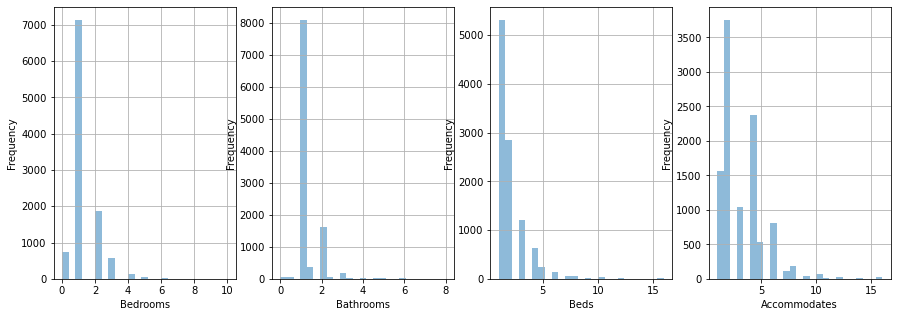

In [49]:
plt.figure(figsize=(15, 5))

plt.subplot(1,4,1)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
plt.xlabel('Bedrooms')

plt.subplot(1,4,2)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(1,4,3)
df['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.subplot(1,4,4)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.show()

Hay valores outliers en todas estas variables que, a priori, me resultan interesantes para la predicción del precio de alquiler de un apartamento

Vamos a ver cómo se relacionan estas variables con la variable objetivo : Price

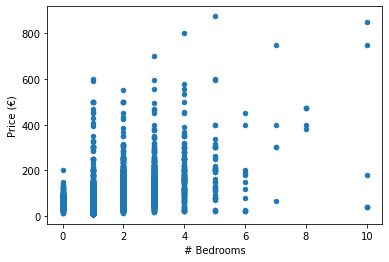

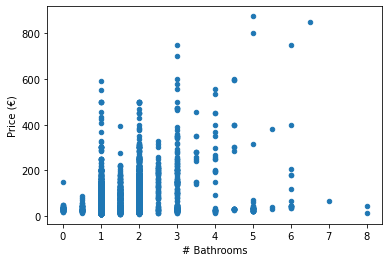

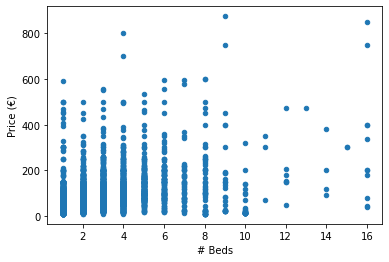

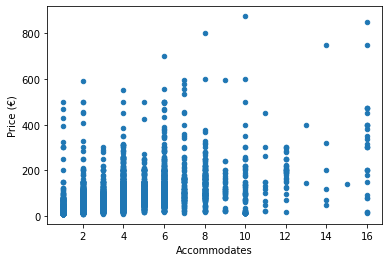

In [50]:
df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price (€)')
plt.show()

df.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price (€)')
plt.show()

df.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('Price (€)')
plt.show()

df.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('Price (€)')
plt.show()

In [51]:
df['Bedrooms'].value_counts()

1.0     7133
2.0     1880
0.0      749
3.0      583
4.0      146
5.0       46
6.0       12
10.0       6
7.0        5
8.0        5
Name: Bedrooms, dtype: int64

Vamos a eliminar valores mayores a 6 dormitorios y pisos con "0 dormitorios"

In [52]:
df_filt = df[(df['Bedrooms'] <= 6) & (df['Bedrooms'] > 0)]
df_filt.head()

,Transit,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,2131,1683,228,3,100.0,70,2.0,2.0,103,65.0,48,3,72.0,2.0,1,40.411016,-3.699656,0,0,4,1.0,1.0,1.0,4,2043,55.0,1,0,1,1125,50,1,6,17,256,72,1231,652,88.0,9.0,8.0,10.0,10.0,9.0,9.0,0,2.0,7.630000,2994
1,2131,1463,132,3,100.0,70,1.0,1.0,9,65.0,121,6,24.0,2.0,1,40.424785,-3.658300,14,1,1,1.0,1.0,1.0,4,4730,21.0,1,0,1,1125,6,30,60,90,365,0,1332,652,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,1.934709,7115
2,1978,1215,228,3,100.0,29,3.0,3.0,127,20.0,39,3,21.0,2.0,1,40.415191,-3.698591,0,0,4,1.0,2.0,4.0,4,2694,110.0,4,15,2,1125,52,11,25,42,289,58,768,639,93.0,9.0,10.0,10.0,10.0,10.0,9.0,1,2.0,2.280000,4429
4,2131,1494,228,3,100.0,79,1.0,1.0,126,47.0,79,13,14.0,2.0,1,40.405865,-3.676475,0,1,2,2.0,1.0,1.0,4,6837,500.0,1,0,1,1125,46,29,59,89,89,1,1215,366,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,0.100000,1503
5,531,1622,132,0,25.0,64,3.0,3.0,9,65.0,84,0,72.0,2.0,1,40.401892,-3.698068,0,1,2,1.0,1.0,1.0,4,8644,65.0,1,0,1,1125,52,1,1,1,1,0,1332,652,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,1.934709,1106


Comprobamos qué % de datos hemos eliminado:

In [53]:
print(f'% eliminado: {(df.shape[0] - df_filt.shape[0])/df.shape[0]*100}')

% eliminado: 7.2408897302413635


Es un % altísimo de eliminación de outliers, no podemos asumirlo ... tendré que asumir los pisos con 0 dormitorios como pisos tipo loft

In [54]:
df_filt = df[(df['Bedrooms'] < 6)]
print(f'% eliminado: {(df.shape[0] - df_filt.shape[0])/df.shape[0]*100}')

% eliminado: 0.2650260293421675


Un 0.26% de limpieza de outliers ya es más lógico. Lo dejo así

Vamos a eliminar también outliers en Bathrooms

In [55]:
df['Bathrooms'].value_counts()

1.0    8105
2.0    1622
1.5     360
3.0     183
2.5      70
0.0      50
0.5      49
5.0      37
4.0      32
4.5      22
6.0      16
3.5      12
5.5       3
8.0       2
7.0       1
6.5       1
Name: Bathrooms, dtype: int64

In [56]:
df_filt = df[(df['Bathrooms'] < 4) & (df['Bathrooms'] > 0)]
df_filt.head()

,Transit,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,2131,1683,228,3,100.0,70,2.0,2.0,103,65.0,48,3,72.0,2.0,1,40.411016,-3.699656,0,0,4,1.0,1.0,1.0,4,2043,55.0,1,0,1,1125,50,1,6,17,256,72,1231,652,88.0,9.0,8.0,10.0,10.0,9.0,9.0,0,2.0,7.630000,2994
1,2131,1463,132,3,100.0,70,1.0,1.0,9,65.0,121,6,24.0,2.0,1,40.424785,-3.658300,14,1,1,1.0,1.0,1.0,4,4730,21.0,1,0,1,1125,6,30,60,90,365,0,1332,652,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,1.934709,7115
2,1978,1215,228,3,100.0,29,3.0,3.0,127,20.0,39,3,21.0,2.0,1,40.415191,-3.698591,0,0,4,1.0,2.0,4.0,4,2694,110.0,4,15,2,1125,52,11,25,42,289,58,768,639,93.0,9.0,10.0,10.0,10.0,10.0,9.0,1,2.0,2.280000,4429
3,3381,1863,132,3,100.0,95,6.0,6.0,81,56.0,111,3,20.0,2.0,1,40.418986,-3.707276,0,0,2,1.0,0.0,1.0,4,2293,39.0,1,0,2,365,52,1,2,11,56,11,1403,652,87.0,8.0,8.0,9.0,9.0,10.0,9.0,1,6.0,2.970000,5322
4,2131,1494,228,3,100.0,79,1.0,1.0,126,47.0,79,13,14.0,2.0,1,40.405865,-3.676475,0,1,2,2.0,1.0,1.0,4,6837,500.0,1,0,1,1125,46,29,59,89,89,1,1215,366,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,0.100000,1503


In [57]:
print(f'% eliminado: {(df.shape[0] - df_filt.shape[0])/df.shape[0]*100}')

% eliminado: 1.55229531471841


Nos pasa como antes, eliminamos demasiadas entradas... Tendré que considerar más baños como válidos

In [58]:
df_filt = df[(df['Bathrooms'] < 6) & (df['Bathrooms'] > 0)]
print(f'% eliminado: {(df.shape[0] - df_filt.shape[0])/df.shape[0]*100}')

% eliminado: 0.6625650733554188


Lo mismo para las camas (Beds) y los huéspedes (Accommodates)

In [59]:
df['Beds'].value_counts()

1.0     5313
2.0     2853
3.0     1202
4.0      628
5.0      246
6.0      131
8.0       57
7.0       50
10.0      31
9.0       26
16.0      11
12.0       7
14.0       4
11.0       3
15.0       2
13.0       1
Name: Beds, dtype: int64

In [60]:
df_filt = df[(df['Beds'] < 9) & (df['Beds'] > 0)]
df_filt.head()

,Transit,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,2131,1683,228,3,100.0,70,2.0,2.0,103,65.0,48,3,72.0,2.0,1,40.411016,-3.699656,0,0,4,1.0,1.0,1.0,4,2043,55.0,1,0,1,1125,50,1,6,17,256,72,1231,652,88.0,9.0,8.0,10.0,10.0,9.0,9.0,0,2.0,7.630000,2994
1,2131,1463,132,3,100.0,70,1.0,1.0,9,65.0,121,6,24.0,2.0,1,40.424785,-3.658300,14,1,1,1.0,1.0,1.0,4,4730,21.0,1,0,1,1125,6,30,60,90,365,0,1332,652,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,1.934709,7115
2,1978,1215,228,3,100.0,29,3.0,3.0,127,20.0,39,3,21.0,2.0,1,40.415191,-3.698591,0,0,4,1.0,2.0,4.0,4,2694,110.0,4,15,2,1125,52,11,25,42,289,58,768,639,93.0,9.0,10.0,10.0,10.0,10.0,9.0,1,2.0,2.280000,4429
3,3381,1863,132,3,100.0,95,6.0,6.0,81,56.0,111,3,20.0,2.0,1,40.418986,-3.707276,0,0,2,1.0,0.0,1.0,4,2293,39.0,1,0,2,365,52,1,2,11,56,11,1403,652,87.0,8.0,8.0,9.0,9.0,10.0,9.0,1,6.0,2.970000,5322
4,2131,1494,228,3,100.0,79,1.0,1.0,126,47.0,79,13,14.0,2.0,1,40.405865,-3.676475,0,1,2,2.0,1.0,1.0,4,6837,500.0,1,0,1,1125,46,29,59,89,89,1,1215,366,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,0.100000,1503


In [61]:
print(f'% eliminado: {(df.shape[0] - df_filt.shape[0])/df.shape[0]*100}')

% eliminado: 0.8045433033601515


In [62]:
df['Accommodates'].value_counts()

2     3754
4     2374
1     1565
3     1039
6      814
5      527
8      187
7      120
10      67
9       38
12      32
16      27
11      12
14       6
13       2
15       1
Name: Accommodates, dtype: int64

In [63]:
df_filt = df[(df['Accommodates'] < 11) & (df['Accommodates'] > 0)]

In [64]:
print(f'% eliminado: {(df.shape[0] - df_filt.shape[0])/df.shape[0]*100}')

% eliminado: 0.7572172266919073


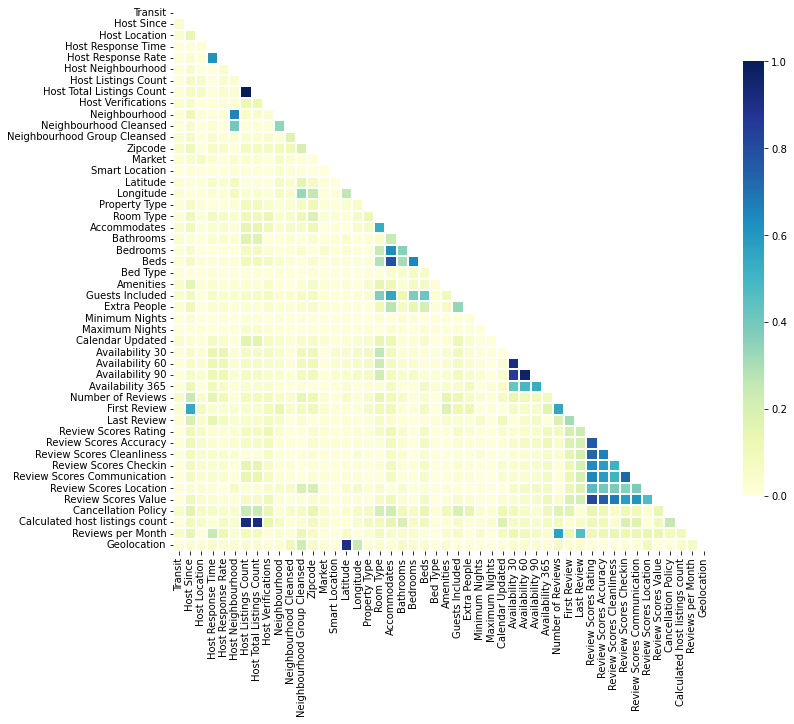

In [65]:
import seaborn as sns

# Vemos la correlación
corr = np.abs(df_filt.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Variables muy correladas: 'Host Total Listings Count' con 'Host Listings Count'; 'Calculated host listings count' con 'Host Total Listings Count' y con 'Host Listings Count'; 'Latitude' con 'Geolocation'; 'Availability 30' con 'Availability 60', 90 y 365; 'Reviews Score Rating' con 'Review Scores Accuracy' y otras tantas... 'Reviews Score Rating' con 'Reviews Score Value'; 'Beds' con 'Accomodates'

Con todo esto, decido eliminar las siguientes variables:

In [66]:
df_filt = df_filt.drop(['Geolocation','Calculated host listings count','Host Total Listings Count','Availability 60','Availability 90','Availability 365','Review Scores Accuracy','Review Scores Communication','Review Scores Cleanliness','Review Scores Checkin','Review Scores Rating','Accommodates'], axis=1)
df_filt.head().T

,0,1,2,3,4
Transit,2131.000000,2131.000000,1978.000000,3381.000000,2131.000000
Host Since,1683.000000,1463.000000,1215.000000,1863.000000,1494.000000
Host Location,228.000000,132.000000,228.000000,132.000000,228.000000
Host Response Time,3.000000,3.000000,3.000000,3.000000,3.000000
Host Response Rate,100.000000,100.000000,100.000000,100.000000,100.000000
Host Neighbourhood,70.000000,70.000000,29.000000,95.000000,79.000000
Host Listings Count,2.000000,1.000000,3.000000,6.000000,1.000000
Host Verifications,103.000000,9.000000,127.000000,81.000000,126.000000
Neighbourhood,65.000000,65.000000,20.000000,56.000000,47.000000
Neighbourhood Cleansed,48.000000,121.000000,39.000000,111.000000,79.000000


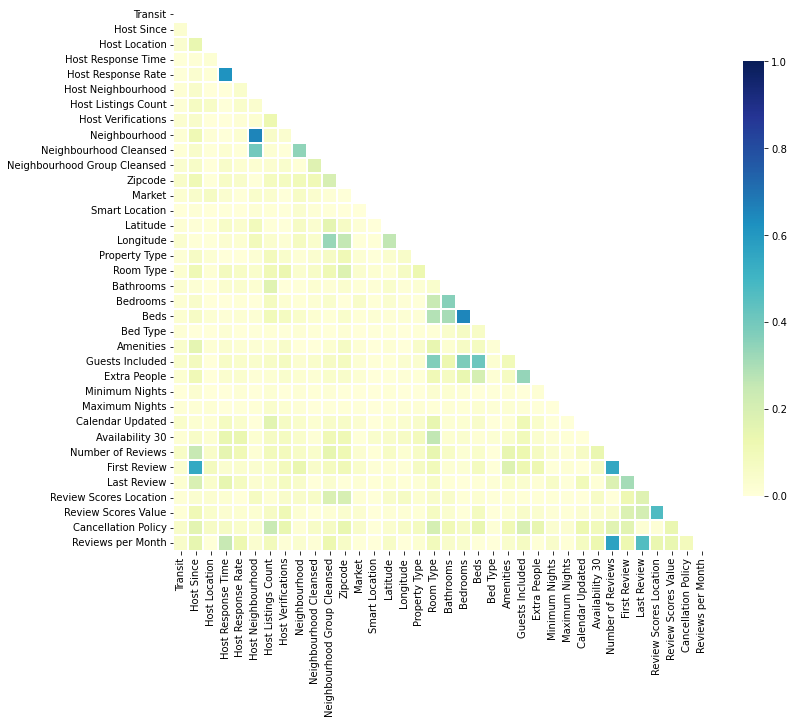

In [67]:
import seaborn as sns

# Vemos la correlación
corr = np.abs(df_filt.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Ya no tenemos variables tan correladas. Aún así, tenemos muchísimas variables. 

### 6) Vamos a ver qué nos dicen los métodos de filtrado.

Preparo el dataset para tener en la primera columna la variable objetivo: *Price*

In [68]:
column_to_move = df_filt.pop("Price")
df_filt.insert(0, 'Price', column_to_move)
df_filt.head().T

,0,1,2,3,4
Price,55.000000,21.000000,110.000000,39.000000,500.000000
Transit,2131.000000,2131.000000,1978.000000,3381.000000,2131.000000
Host Since,1683.000000,1463.000000,1215.000000,1863.000000,1494.000000
Host Location,228.000000,132.000000,228.000000,132.000000,228.000000
Host Response Time,3.000000,3.000000,3.000000,3.000000,3.000000
Host Response Rate,100.000000,100.000000,100.000000,100.000000,100.000000
Host Neighbourhood,70.000000,70.000000,29.000000,95.000000,79.000000
Host Listings Count,2.000000,1.000000,3.000000,6.000000,1.000000
Host Verifications,103.000000,9.000000,127.000000,81.000000,126.000000
Neighbourhood,65.000000,65.000000,20.000000,56.000000,47.000000


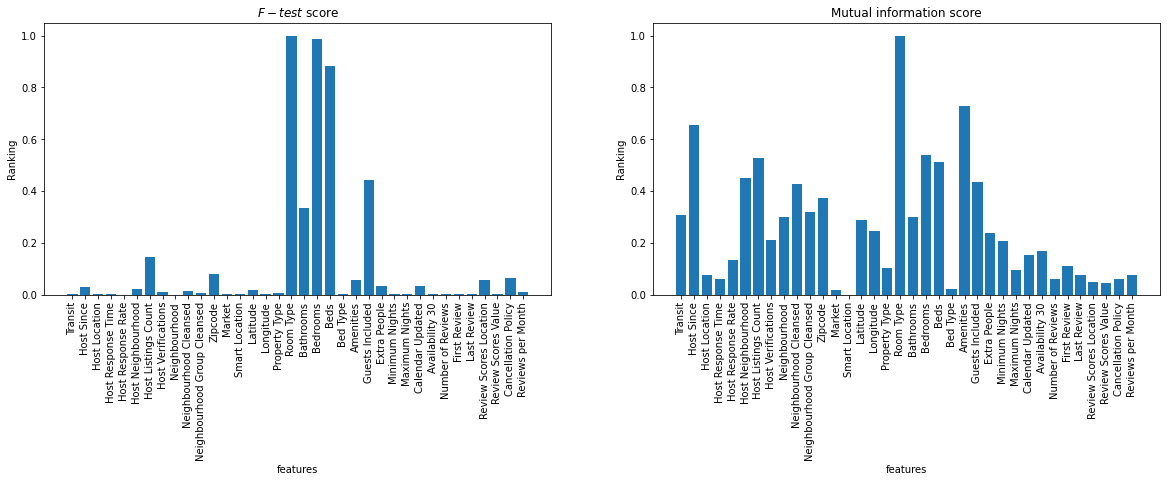

In [69]:
from sklearn.feature_selection import f_classif, mutual_info_classif, f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_filt.values 

y = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X = data[:,1:]      # nos quedamos con el resto

feature_names = df_filt.columns[1:]

# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Variables que son importantes per-se: *Room Type, Bathrooms, Bedrooms, Beds, Guests Included*. Y un poco menos, *Host Listings Count, Zipcode*.

### 6) Aplico el primer modelo - Regresión lineal con regularización de Lasso

In [70]:
#Veo qué shape tengo:
df_filt.shape

(10485, 37)

In [71]:
df_filt.head(5).T

,0,1,2,3,4
Price,55.000000,21.000000,110.000000,39.000000,500.000000
Transit,2131.000000,2131.000000,1978.000000,3381.000000,2131.000000
Host Since,1683.000000,1463.000000,1215.000000,1863.000000,1494.000000
Host Location,228.000000,132.000000,228.000000,132.000000,228.000000
Host Response Time,3.000000,3.000000,3.000000,3.000000,3.000000
Host Response Rate,100.000000,100.000000,100.000000,100.000000,100.000000
Host Neighbourhood,70.000000,70.000000,29.000000,95.000000,79.000000
Host Listings Count,2.000000,1.000000,3.000000,6.000000,1.000000
Host Verifications,103.000000,9.000000,127.000000,81.000000,126.000000
Neighbourhood,65.000000,65.000000,20.000000,56.000000,47.000000


In [72]:
from sklearn import preprocessing

#Preparamos los datos
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df_filt.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [73]:
print(f'tamaño X_train: {X_train.shape}')
print(f'tamaño y_train: {y_train.shape}')

tamaño X_train: (10485, 36)
tamaño y_train: (10485, 1)


In [74]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Lasso

tscv = TimeSeriesSplit(n_splits=3)

alpha_vector = np.logspace(-4,4,20)
param_grid = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(), param_grid=param_grid, cv = tscv.split(X_train)).fit(X_train, y_train)

best mean cross-validation score: 0.425
best parameters: {'alpha': 0.23357214690901212}


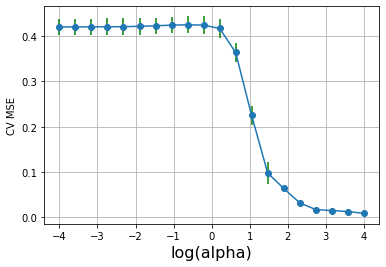

In [75]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(alpha_vector),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('CV MSE')
plt.grid()
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)

mseTrainModelLasso = mean_squared_error(y_train, ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.55e+03
RMSE Modelo Lasso (train): 39.4
Transit 9.404620261082884e-05
Host Since -0.0034664927874237957
Host Location -0.021928695674586374
Host Response Time 0.7499202854285232
Host Response Rate -0.014187956205848692
Host Neighbourhood 0.13871881995482246
Host Listings Count 0.17901824591001594
Host Verifications -0.013923637659570328
Neighbourhood -0.06490633349649058
Neighbourhood Cleansed -0.0041000993420524075
Neighbourhood Group Cleansed -0.0
Zipcode -0.20792037518838866
Market 0.0
Smart Location -0.0
Latitude 0.0
Longitude 0.0
Property Type 0.057257361363076145
Room Type -37.614154733387544
Bathrooms 13.921991537530305
Bedrooms 13.77064447053423
Beds 5.503288664298402
Bed Type 0.0
Amenities -0.0008923561118078751
Guests Included 2.6253772215652895
Extra People -0.17262426358006513
Minimum Nights 0.023207630928115106
Maximum Nights -9.106886390841975e-05
Calendar Updated 0.02437595216286113
Availability 30 0.7929893939095508
Number of Reviews -0.053746

Me quedaría con los coeficientes de variables que son > 0 :

In [77]:
for f,wi in zip(feature_names,w):
    if abs(wi) > 0.000:
        print(f,wi)

Transit 9.404620261082884e-05
Host Since -0.0034664927874237957
Host Location -0.021928695674586374
Host Response Time 0.7499202854285232
Host Response Rate -0.014187956205848692
Host Neighbourhood 0.13871881995482246
Host Listings Count 0.17901824591001594
Host Verifications -0.013923637659570328
Neighbourhood -0.06490633349649058
Neighbourhood Cleansed -0.0041000993420524075
Zipcode -0.20792037518838866
Property Type 0.057257361363076145
Room Type -37.614154733387544
Bathrooms 13.921991537530305
Bedrooms 13.77064447053423
Beds 5.503288664298402
Amenities -0.0008923561118078751
Guests Included 2.6253772215652895
Extra People -0.17262426358006513
Minimum Nights 0.023207630928115106
Maximum Nights -9.106886390841975e-05
Calendar Updated 0.02437595216286113
Availability 30 0.7929893939095508
Number of Reviews -0.05374625696790177
First Review 0.003082283240090144
Last Review -0.005416504959021068
Review Scores Location 5.392765154268826
Review Scores Value 2.4916748897272463
Cancellation

### 7) Evaluación del modelo con el conjunto de Test:

Ahora, para ver qué tal es el modelo con el conjunto de test, tengo que aplicarle las mismas etapas de pre-procesamiento

In [78]:
#Abro el csv previamente generado
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')
df_test.head().T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Transit,NaN,Si vienes un Domingo estarás en el mercado más...,"Andando, metro o autobuses!!!","Sol metro station is 200 mts away, but you won...","Renfe líneas C7-C2 a 10 min, metro L1 a 5 min,..."
Host Since,2016-07-21,2015-11-06,2016-12-01,2011-11-19,2016-11-01
Host Location,Spain,"Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Madrid, Spain",NaN
Host Response Time,within a day,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,65.0,100.0,83.0,100.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,La Sagrada Família,NaN,NaN,Malasaña,NaN
Host Listings Count,136.0,1.0,1.0,9.0,1.0
Host Total Listings Count,136.0,1.0,1.0,9.0,1.0


Elimino las mismas variables que en Train y relleno los na con el mismo criterio:

In [79]:
df_test = df_test.drop(['Square Feet','Weekly Price','Monthly Price', 'Security Deposit','Cleaning Fee'], axis=1)
df_test = df_test.drop(["Experiences Offered"], axis=1)
df_test = df_test.drop(["Street"], axis=1)
df_test = df_test.drop(['Host Acceptance Rate','Has Availability','Jurisdiction Names'], axis=1)
df_test = df_test.drop(['Geolocation', 'Calculated host listings count','Host Total Listings Count','Availability 60','Availability 90','Availability 365','Review Scores Accuracy','Review Scores Communication','Review Scores Cleanliness','Review Scores Checkin','Review Scores Rating','Accommodates'], axis=1)

df_test["Transit"].fillna(df_test["Transit"].mode()[0], inplace=True)
df_test["Host Since"].fillna(df_test["Host Since"].mode()[0], inplace=True)
df_test["Host Location"].fillna(df_test["Host Location"].mode()[0], inplace=True)
df_test["Host Response Time"].fillna(df_test["Host Response Time"].mode()[0], inplace=True)
df_test["Host Response Rate"].fillna(df_test["Host Response Rate"].mode()[0], inplace=True)
df_test["Host Neighbourhood"].fillna(df_test["Host Neighbourhood"].mode()[0], inplace=True)
df_test["Host Listings Count"].fillna(df_test["Host Listings Count"].mode()[0], inplace=True)
df_test["Host Verifications"].fillna(df_test["Host Verifications"].mode()[0], inplace=True)

df_test["Bathrooms"].fillna(df_test["Bathrooms"].mode()[0], inplace=True)
df_test["Bedrooms"].fillna(df_test["Bedrooms"].mode()[0], inplace=True)
df_test["Beds"].fillna(df_test["Beds"].mode()[0], inplace=True)
df_test["Price"].fillna(df_test["Price"].mean(), inplace=True)

df_test["First Review"].fillna(df_test["First Review"].mode()[0], inplace=True)
df_test["Last Review"].fillna(df_test["Last Review"].mode()[0], inplace=True)
df_test["Review Scores Location"].fillna(df_test["Review Scores Location"].mode()[0], inplace=True)
df_test["Review Scores Value"].fillna(df_test["Review Scores Value"].mode()[0], inplace=True)
df_test["Reviews per Month"].fillna(df_test["Reviews per Month"].mean(), inplace=True)


Los *LabelEncoder* tienen que ser los mismos que en Train

In [80]:
df_test["Neighbourhood"] = le_ngb.fit_transform(df_test["Neighbourhood"])
df_test["Zipcode"] = le_zc.fit_transform(df_test["Zipcode"])
df_test["Market"] = le_mkt.fit_transform(df_test["Market"])

#Para estas variables ahora ya puedo rellenar los nulos usando algoritmo KNN:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

neighb_column = df_test["Neighbourhood"].values.reshape(-1,1)
imputed_neighb = imputer.fit_transform(neighb_column)
df_test["Neighbourhood"] = imputed_neighb

zcode_column = df_test["Zipcode"].values.reshape(-1,1)
imputed_zcode = imputer.fit_transform(zcode_column)
df_test["Zipcode"] = imputed_zcode

market_column = df_test["Market"].values.reshape(-1,1)
imputed_market = imputer.fit_transform(market_column)
df_test["Market"] = imputed_market

In [81]:
df_test["Transit"] = le_transit.fit_transform(df_test["Transit"])

df_test["Host Since"] = le_hsince.fit_transform(df_test["Host Since"])

df_test["Host Location"] = le_hloc.fit_transform(df_test["Host Location"])

df_test["Host Response Time"] = le_hresp.fit_transform(df_test["Host Response Time"])

df_test["Host Neighbourhood"] = le_hneighb.fit_transform(df_test["Host Neighbourhood"])

df_test["Host Verifications"] = le_hver.fit_transform(df_test["Host Verifications"])

df_test["Neighbourhood Cleansed"] = le_neighbcl.fit_transform(df_test["Neighbourhood Cleansed"])

df_test["Neighbourhood Group Cleansed"] = le_neighbgcl.fit_transform(df_test["Neighbourhood Group Cleansed"])

df_test["Smart Location"] = le_smloc.fit_transform(df_test["Smart Location"])

df_test["Property Type"] = le_proptype.fit_transform(df_test["Property Type"])

df_test["Room Type"] = le_roomtype.fit_transform(df_test["Room Type"])

df_test["Bed Type"] = le_bedtype.fit_transform(df_test["Bed Type"])

df_test["Amenities"] = le_ameni.fit_transform(df_test["Amenities"])

df_test["Calendar Updated"] = le_calup.fit_transform(df_test["Calendar Updated"])

df_test["First Review"] = le_frev.fit_transform(df_test["First Review"])

df_test["Last Review"] = le_lrev.fit_transform(df_test["Last Review"])

df_test["Cancellation Policy"] = le_cancel.fit_transform(df_test["Cancellation Policy"])

In [82]:
df_test.head().T

,0,1,2,3,4
Transit,544.000000,1093.000000,148.000000,1101.000000,1052.000000
Host Since,1104.000000,908.000000,1201.000000,74.000000,1180.000000
Host Location,148.000000,96.000000,96.000000,97.000000,96.000000
Host Response Time,1.000000,3.000000,3.000000,2.000000,3.000000
Host Response Rate,65.000000,100.000000,83.000000,100.000000,100.000000
Host Neighbourhood,47.000000,45.000000,45.000000,50.000000,45.000000
Host Listings Count,136.000000,1.000000,1.000000,9.000000,1.000000
Host Verifications,44.000000,44.000000,78.000000,31.000000,82.000000
Neighbourhood,62.000000,62.000000,62.000000,54.000000,62.000000
Neighbourhood Cleansed,53.000000,47.000000,47.000000,107.000000,26.000000


In [83]:
#Compruebo que el shape[1] sea igual al de Train
print(df_test.shape)

(2642, 37)


In [84]:
#Transformación para tener en la primera columna 'Price'
column_to_move = df_test.pop("Price")
df_test.insert(0, 'Price', column_to_move)
df_test.head().T

,0,1,2,3,4
Price,163.000000,40.000000,55.000000,65.000000,15.000000
Transit,544.000000,1093.000000,148.000000,1101.000000,1052.000000
Host Since,1104.000000,908.000000,1201.000000,74.000000,1180.000000
Host Location,148.000000,96.000000,96.000000,97.000000,96.000000
Host Response Time,1.000000,3.000000,3.000000,2.000000,3.000000
Host Response Rate,65.000000,100.000000,83.000000,100.000000,100.000000
Host Neighbourhood,47.000000,45.000000,45.000000,50.000000,45.000000
Host Listings Count,136.000000,1.000000,1.000000,9.000000,1.000000
Host Verifications,44.000000,44.000000,78.000000,31.000000,82.000000
Neighbourhood,62.000000,62.000000,62.000000,54.000000,62.000000


Preparamos los datos para scikit learn:

In [85]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, Price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

print(f'tamaño X_test: {X_test.shape}')
print(f'tamaño y_test: {y_test.shape}')

tamaño X_test: (2642, 36)
tamaño y_test: (2642, 1)


Probamos modelo con datos de Test:

In [86]:
#Esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training
XtestScaled = scaler.transform(X_test) 

ytestLasso  = lasso.predict(X_test)
mseTestModelLasso = mean_squared_error(y_test, ytestLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)
print('RMSE Modelo Lasso (test): %0.3g' % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (test) : 1.47e+03
RMSE Modelo Lasso (test): 38.4


In [87]:
from sklearn.metrics import r2_score

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 train: {:.3f}".format(r2_train))
print("R2 test: {:.3f}".format(r2_test))

R2 train: 0.443
R2 test: 0.506


En resumen y comparación:

In [88]:
print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)
print('-------')
print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (train): 1.55e+03
MSE Modelo Lasso (test) : 1.47e+03
-------
RMSE Modelo Lasso (train): 39.4
RMSE Modelo Lasso (test) : 38.4


Voy a hacer una pequeña comprobación del precio medio que me dan ambos conjuntos, para ver que no están alejados del precio medio del dataset original:

In [89]:
#Precio Medio del dataset completo:
full_df['Price'].mean()

65.92468555841795

In [90]:
#Precio Medio del dataset de Train:
df_filt['Price'].mean()

64.5093374175016

In [91]:
#Precio Medio del dataset de Test:
df_test['Price'].mean()

66.53598484848484

### 8) Ahora voy a probar qué resultados me dan otros modelos de ML

In [92]:
print(f'tamaño X_train: {X_train.shape}')
print(f'tamaño y_train: {y_train.shape}')
print('-------')
print(f'tamaño X_test: {X_test.shape}')
print(f'tamaño y_test: {y_test.shape}')

tamaño X_train: (10485, 36)
tamaño y_train: (10485, 1)
-------
tamaño X_test: (2642, 36)
tamaño y_test: (2642, 1)


#### 8.1 Árbol de decisión

Utilizo GridSearch para ver qué profundidad de árbol es la óptima:

best mean cross-validation score: 0.439
best parameters: {'max_depth': 4}


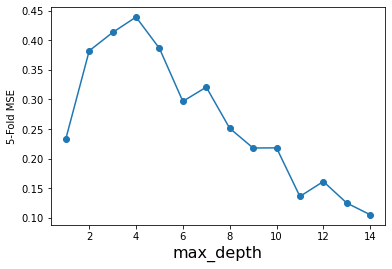

In [93]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

A partir de profundidad 4, el algoritmo se "pierde" y bajan sus prestaciones. Esto puede ser porque el árbol de decisión le da mucha importancia a las variables predictoras que sean más dominantes y en este caso tenemos varias de ese tipo y una vez que prioriza esas, no sabe qué hacer con las restantes.

In [94]:
maxDepthOptimo = grid.best_params_['max_depth'] 
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("R2 Train DecisionTree: ",treeModel.score(X_train,y_train))
print("R2 Test DecisionTree: ",treeModel.score(X_test,y_test))

R2 Train DecisionTree:  0.48628114920027987
R2 Test DecisionTree:  0.524534786184386


Valores bastante bajitos de R2. Aun así, generaliza bastante bien y R2 mejora un poco en *test*. Vamos a ver la importancia de las variables predictoras:

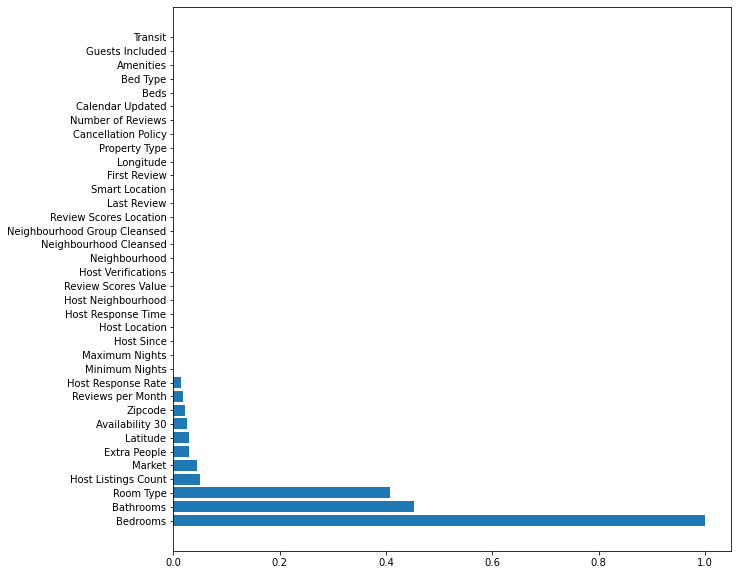

In [95]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Aquí se ve lo que comentaba más arriba, la predicción la fundamenta, básicamente, en *Room Type, Bathrooms y Bedrooms*. El resto de variables es que apenas las considera (*Host Listings Count, Market...*) o ni siquiera las valora (*Property Type, Zipcode...*)

#### 8.2 Bagging

Igual que antes, uso GridSearch para buscar la mejor profundidad de árbol

best mean cross-validation score: 0.562
best parameters: {'base_estimator__max_depth': 14}


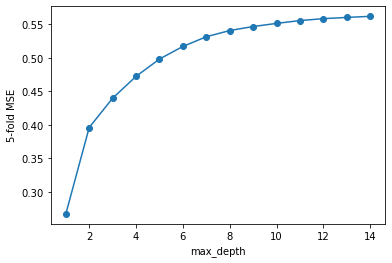

In [96]:
from sklearn.ensemble import BaggingRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(
    BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        random_state=0,
        n_estimators=200), 
    param_grid=tuned_parameters,
    cv=5,
) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold MSE')

plt.show()

Vemos las métricas del algoritmo:

In [97]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
bagModel = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),
        random_state=0,
        n_estimators=200).fit(X_train,y_train)

print("R2 Train Bagging: ",bagModel.score(X_train,y_train))
print("R2 Test Bagging: ",bagModel.score(X_test,y_test))

R2 Train Bagging:  0.8989985581499746
R2 Test Bagging:  0.5988031356474783


Pinto las importancias de cada variable que le da *Bagging*:

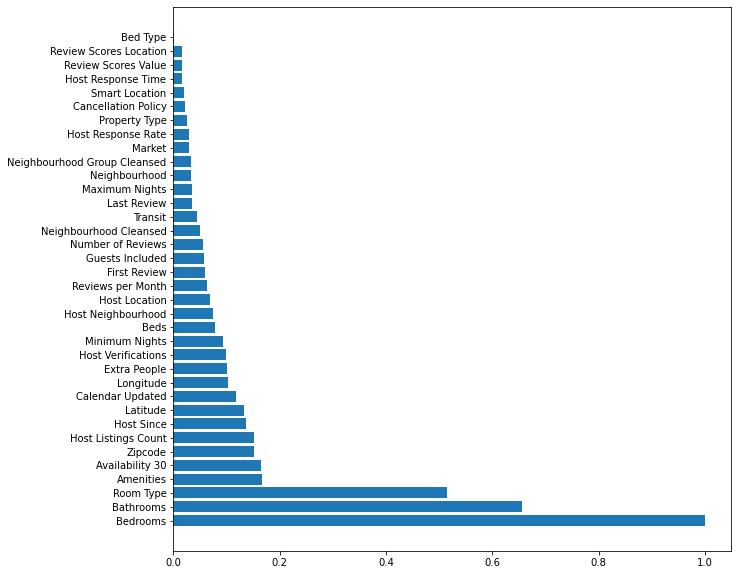

In [98]:
importances = np.mean([
    tree.feature_importances_ for tree in bagModel.estimators_
], axis=0)
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Con Bagging vemos que sí que considera todas las variables, pero el peso de la predicción se lo da principalmente a 3, las mismas que el Árbol (*Room Type, Bathrooms y Bedrooms*). 

#### 8.3 Random Forest

Utilizo GridSearch para ver la profundidad de RandomForest óptima:

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END .......................................

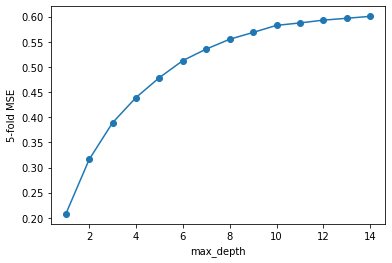

In [99]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters, cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold MSE')

plt.show()

In [100]:
maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestRegressor(criterion = 'squared_error', random_state=0, max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train) 

print("R2 Train RandomForest: ",rf.score(X_train,y_train))
print("R2 Test RandomForest: ",rf.score(X_test,y_test))

R2 Train RandomForest:  0.8908907100537691
R2 Test RandomForest:  0.627689219608656


Con el R2 óptimo que da GridSearch salen muy buenos valores la verdad. Sin embargo, viendo la curva, quiero probar con profundidad 10 porque luego tampoco mejora tanto...

In [101]:
rf = RandomForestRegressor(random_state=0, max_depth=10,n_estimators=200,max_features='sqrt').fit(X_train,y_train) 

print("R2 Train: ",rf.score(X_train,y_train))
print("R2 Test: ",rf.score(X_test,y_test))

R2 Train:  0.7827175717147968
R2 Test:  0.6096420527804494


He perdido bastantes prestaciones, voy a ver con profundidad = 12 si no caigo en *overfitting*

In [102]:
rf = RandomForestRegressor(random_state=0, max_depth=12,n_estimators=200,max_features='sqrt').fit(X_train,y_train) 

print("R2 Train: ",rf.score(X_train,y_train))
print("R2 Test: ",rf.score(X_test,y_test))

R2 Train:  0.8484701222078006
R2 Test:  0.6231352018624513


Mejoro un poquito sin caer en *overfitting*, me quedo con profundidad 12

Ahora pinto la importancia de las variables para RandomForest:

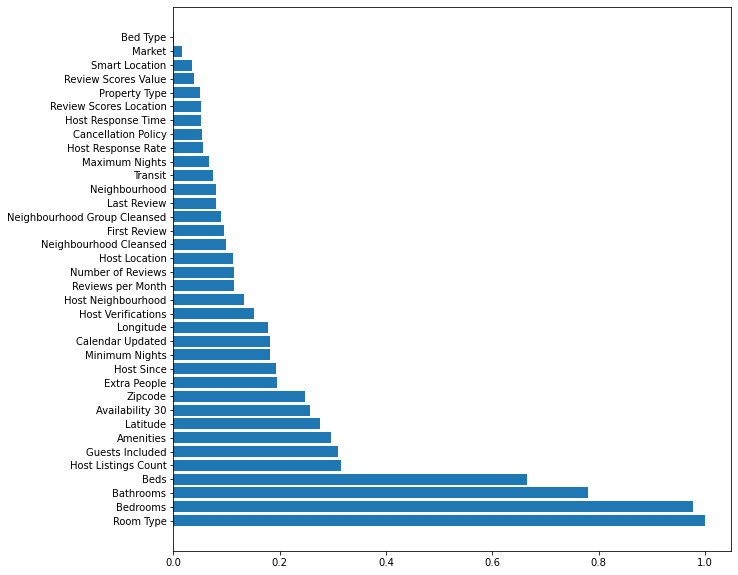

In [103]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

RandomForest nos da un resultado mejor, en el sentido de que es capaz de mirar todos los predictores y sacar una imagen más certera.

### 9) Voy a tratar de mejorar este modelo de RandomForest:

Elimino variables que he visto que no se usan

In [104]:
df_rf = df_filt
df_rf.head(5).T

,0,1,2,3,4
Price,55.000000,21.000000,110.000000,39.000000,500.000000
Transit,2131.000000,2131.000000,1978.000000,3381.000000,2131.000000
Host Since,1683.000000,1463.000000,1215.000000,1863.000000,1494.000000
Host Location,228.000000,132.000000,228.000000,132.000000,228.000000
Host Response Time,3.000000,3.000000,3.000000,3.000000,3.000000
Host Response Rate,100.000000,100.000000,100.000000,100.000000,100.000000
Host Neighbourhood,70.000000,70.000000,29.000000,95.000000,79.000000
Host Listings Count,2.000000,1.000000,3.000000,6.000000,1.000000
Host Verifications,103.000000,9.000000,127.000000,81.000000,126.000000
Neighbourhood,65.000000,65.000000,20.000000,56.000000,47.000000


In [105]:
df_rf = df_rf.drop(['Bed Type', 'Market', 'Smart Location', 'Review Scores Value', 'Property Type', 'Review Scores Location', 'Host Response Time', 'Cancellation Policy', 'Host Response Rate'] , axis = 1)
df_rf.head(5).T

,0,1,2,3,4
Price,55.000000,21.000000,110.000000,39.000000,500.000000
Transit,2131.000000,2131.000000,1978.000000,3381.000000,2131.000000
Host Since,1683.000000,1463.000000,1215.000000,1863.000000,1494.000000
Host Location,228.000000,132.000000,228.000000,132.000000,228.000000
Host Neighbourhood,70.000000,70.000000,29.000000,95.000000,79.000000
Host Listings Count,2.000000,1.000000,3.000000,6.000000,1.000000
Host Verifications,103.000000,9.000000,127.000000,81.000000,126.000000
Neighbourhood,65.000000,65.000000,20.000000,56.000000,47.000000
Neighbourhood Cleansed,48.000000,121.000000,39.000000,111.000000,79.000000
Neighbourhood Group Cleansed,3.000000,6.000000,3.000000,3.000000,13.000000


In [106]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = df_rf.values
y_train_rf = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X_train_rf = data[:,1:]      # nos quedamos con el resto
feature_names_rf = df_rf.columns[1:] #nombres columnas

print(f'tamaño X_train_rf: {X_train_rf.shape}')
print(f'tamaño y_train_rf: {y_train_rf.shape}')

tamaño X_train_rf: (10485, 27)
tamaño y_train_rf: (10485, 1)


Aplico el mismo procesamiento al conjunto de test:

In [107]:
df_rf_test = df_test
df_rf_test.head(5).T

,0,1,2,3,4
Price,163.000000,40.000000,55.000000,65.000000,15.000000
Transit,544.000000,1093.000000,148.000000,1101.000000,1052.000000
Host Since,1104.000000,908.000000,1201.000000,74.000000,1180.000000
Host Location,148.000000,96.000000,96.000000,97.000000,96.000000
Host Response Time,1.000000,3.000000,3.000000,2.000000,3.000000
Host Response Rate,65.000000,100.000000,83.000000,100.000000,100.000000
Host Neighbourhood,47.000000,45.000000,45.000000,50.000000,45.000000
Host Listings Count,136.000000,1.000000,1.000000,9.000000,1.000000
Host Verifications,44.000000,44.000000,78.000000,31.000000,82.000000
Neighbourhood,62.000000,62.000000,62.000000,54.000000,62.000000


In [108]:
df_rf_test = df_rf_test.drop(['Bed Type', 'Market', 'Smart Location', 'Review Scores Value', 'Property Type', 'Review Scores Location', 'Host Response Time', 'Cancellation Policy', 'Host Response Rate'] , axis = 1)
df_rf_test.head(5).T

,0,1,2,3,4
Price,163.000000,40.000000,55.000000,65.000000,15.000000
Transit,544.000000,1093.000000,148.000000,1101.000000,1052.000000
Host Since,1104.000000,908.000000,1201.000000,74.000000,1180.000000
Host Location,148.000000,96.000000,96.000000,97.000000,96.000000
Host Neighbourhood,47.000000,45.000000,45.000000,50.000000,45.000000
Host Listings Count,136.000000,1.000000,1.000000,9.000000,1.000000
Host Verifications,44.000000,44.000000,78.000000,31.000000,82.000000
Neighbourhood,62.000000,62.000000,62.000000,54.000000,62.000000
Neighbourhood Cleansed,53.000000,47.000000,47.000000,107.000000,26.000000
Neighbourhood Group Cleansed,14.000000,3.000000,3.000000,3.000000,19.000000


In [109]:
data = df_rf_test.values
y_test_rf = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X_test_rf = data[:,1:]  # nos quedamos con el resto

print(f'tamaño X_test_rf: {X_test_rf.shape}')
print(f'tamaño y_test_rf: {y_test_rf.shape}')

tamaño X_test_rf: (2642, 27)
tamaño y_test_rf: (2642, 1)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END .......................................

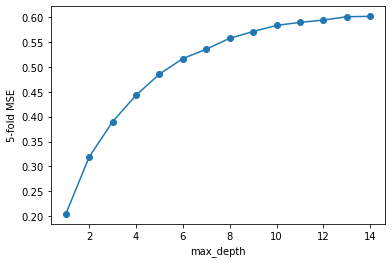

In [112]:
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters, cv=5, verbose=2) 
grid.fit(X_train_rf, y_train_rf)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold MSE')

plt.show()

Me quedo con *depth* = 12 como en el modelo anterior de RF.

In [113]:
rf_2 = RandomForestRegressor(random_state=0, max_depth=12,n_estimators=200,max_features='sqrt').fit(X_train_rf,y_train_rf) 

print("R2 Train RandomForest 2: ",rf_2.score(X_train_rf,y_train_rf))
print("R2 Test RandomForest 2: ",rf_2.score(X_test_rf,y_test_rf))

R2 Train RandomForest 2:  0.8496222084848806
R2 Test RandomForest 2:  0.6197454891986158


Pues no hemos mejorado mucho, la verdad... vamos a ver qué importancia da a estas variables, reducidas:

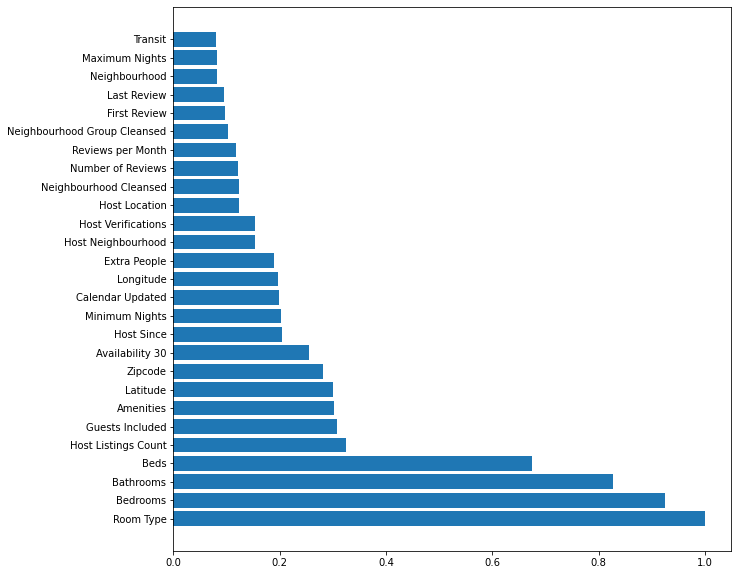

In [114]:
importances = rf_2.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train_rf.shape[1]),importances[indices])
plt.yticks(range(X_train_rf.shape[1]),feature_names_rf[indices])
plt.show()

Tampoco se observa un cambio notable en la importancia de las variables

### **** CONCLUSION ****

Efectivamente, y tal y como dijo el profesor del Módulo, la fase más dura y ardua ha sido la de limpieza y preprocesado de los datos. El trabajo no es lineal, a medida que vas sacando cosas necesitas volver atrás en el código y rehacer ciertas implementaciones.

El primer modelo tenía que ser el más simple: la regresión lineal. No nos ha dado unos resultados muy buenos en cuanto a métricas. Sin embargo, cuando he sacado la media de precios en train, test y en el df original me ha sorprendido que el modelo no andaba mal encaminado.

Luego he querido probar con los modelos de Árboles de Decisión y he podido ver las diferencias de cada uno: muy notable la dependencia en los predictores fuertes en el Árbol Simple. No he conseguido optimizar RandomForest como me hubiera gustado, he reducido variables pero aún así no mejoraba el R2.

Como conclusión respecto al Dataset de Airbnb, vemos que una de las variable más importantes para predecir el precio (en todos los modelos) es la *Room Type* y tiene todo el sentido: no es lo mismo alquilar un piso completo que una habitación en un piso compartido. Modelos más sencillos como el Árbol simple y Baggin valoraban como la más fuerte a *Bedrooms*. Luego, me esperaba más relevancia del *Zipcode* (que implica el barrio, al fin y al cabo) pero no ha sido así. No hemos podido usar correctamente los m2 del piso porque teníamos poquísimos datos, pero creo que podría haber sido una buena variable predictora.